# Description

For the decision trees and random forest we will be using data from [LendingClub.com](www.lendingclub.com)

Lending Club is an online money lending platform where people borrow and invest money.

# Problem Statement

As an investor, you would always want to give money to people who are likely to pay you back. Using Decision Trees and Random Forests determine if a person who has been given money will pay it back or not. The data is from 2007 to 2010. To futher understand the dataset please refer to this link [OpenIntro.org](https://www.openintro.org/data/index.php?data=loans_full_schema)

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv("./loan_data.csv")

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


### Exploratory Data Analysis

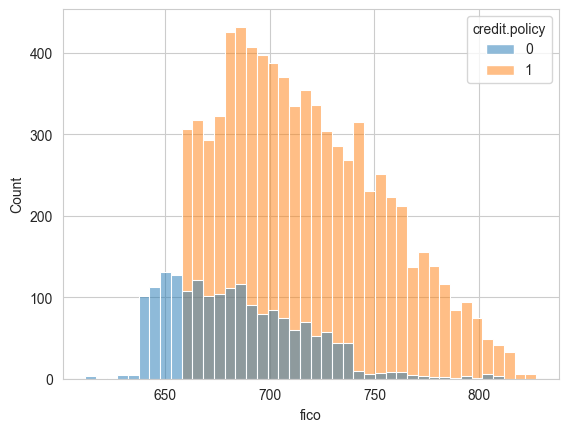

In [13]:
# FICO column represents the credit score of the borrower
# let's plot it out
sns.histplot(x=df["fico"], hue=df["credit.policy"])
plt.show()

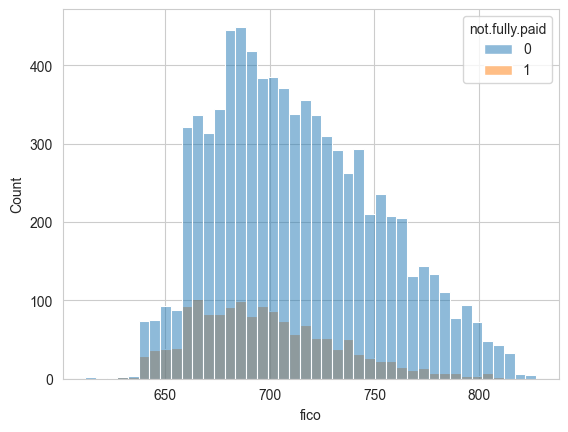

In [14]:
# Do the same plot but this time against not.full.paid column
sns.histplot(x=df["fico"], hue=df["not.fully.paid"])
plt.show()

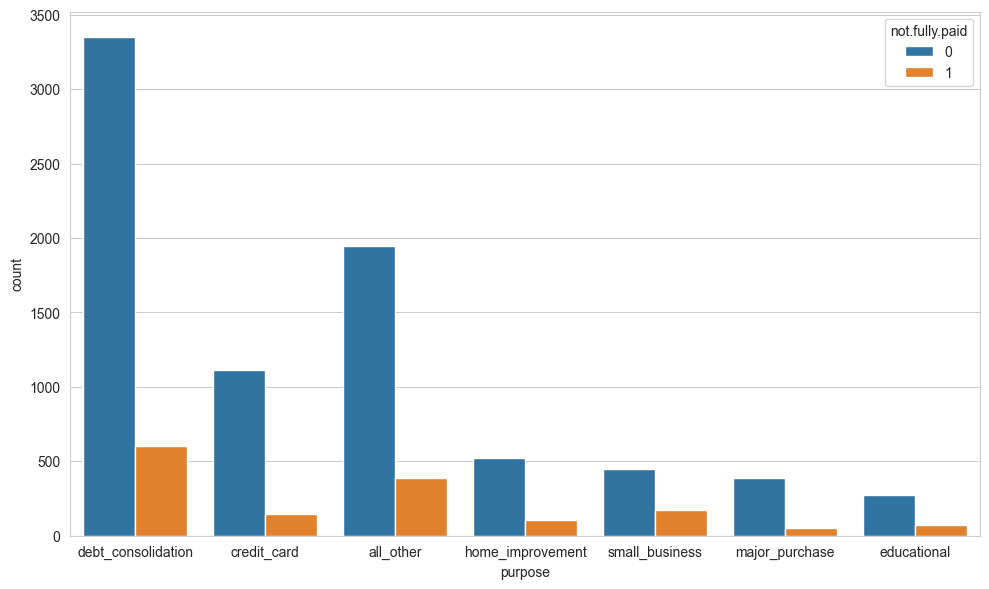

In [22]:
# Let's how many loans were taken based off of "purpose" column
plt.figure(figsize=(10, 6))
sns.countplot(x=df["purpose"], hue=df["not.fully.paid"])
plt.tight_layout()
plt.show()

### Setting Categorical Features

Since the purpose column is categorical, which means we need to use **pd.get_dummies()** in order to one hot encode it.

In [27]:
converted_data = pd.get_dummies(df, columns=["purpose"], drop_first=True)

In [28]:
converted_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [35]:
X = converted_data.drop("not.fully.paid", axis=1)
y = converted_data["not.fully.paid"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

### Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

### Evaluate The Model

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [40]:
predictions = dtree.predict(X_test)

In [41]:
print(confusion_matrix(y_test, predictions))

[[1998  433]
 [ 345   98]]


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [46]:
print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")

Accuracy: 72.93%


### Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=700)

In [ ]:
rfc.fit(X_train, y_train)

### Evaluate The Model

In [50]:
predictions = rfc.predict(X_test)

In [51]:
print(confusion_matrix(y_test, predictions))

[[2423    8]
 [ 435    8]]


In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [53]:
print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")

Accuracy: 84.59%


### Takeways

For this specific dataset, Random Forest performed better than Decision Trees but this doesn't necessarily mean that everytime Random Forest will perform better, sometimes Decision Trees do perform better than Random Forest.